# Tear Of The Kingdom ABSA Part II

If you've read part one I have done the exact same thingbut instead of running the absa for all possible aspects inside a jupyter notebook I have run a separate model for each area of the game and its sub aspects. The key difference is that instead of running the model on the whole review I identify the aspect on a per sentence basis and run the model exclusively on that sentence. The "sub-aspects" I chose were more particular this time after some more EDA into the terms and phrases that appear in the reviews. 

Hopefully the choice to use an increased number of more particular terms and phrases as aspects provides greater and more accurate represenation of aspects and their sentiments. 

In [1]:
#IMPORT NECESSARY MODULES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from ast import literal_eval

The sentiment values were all stored in csvs which I can directly call. 

In [2]:
totk_reviews = pd.read_csv('cleaned_totk_reviews.csv')

In [3]:
def make_dict(agg_terms):
    empt_dict = {}
    for a,t in agg_terms:
        for term in t:
            empt_dict.update({term:a})
    return empt_dict

In [4]:
def aspect_name_replacement(aspect_list, r_dict):
        
        #aspects_within = [char for char in aspect_list]
        
        series = pd.Series(aspect_list)
        
        series.replace(r_dict              
                        
                      , inplace=True)
        #returns the series as a list
        return list(set(series.tolist()))
        

In [68]:
def plots(df, df2, ):

    (
    df.explode('Aspects')
                           .groupby(['Aspects','review_sentiment'])['review_sentiment']
                           .count()
                           .unstack()
                           .plot.bar(ax=ax[0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
    )
    ax[0].set_xlabel('', rotation=0)
    #retrieves the y tick values for the plot
    yticks_mentions = ax[0].get_yticks()
    
    ax[0].set_yticks(yticks_mentions)


        
    (
    df2.set_index('Aspect')
    .plot.bar(ax=ax[1],color=['forestgreen','firebrick','cornflowerblue'], rot=65)
    )


    ax[1].legend(loc='best')
    ax[1].set_yticks(yticks_mentions)
    ax[0].set_ylabel('', rotation=0)


    

## Story and Characters

In [24]:
storychar_aggterms=[('Main Story',['main story','main storyline','main plot','plot','story','storyline',
                                    'storytelling','narrative','narratives']),
                     ('Main Quests',['main quest','main quests','main mission','main objective']),
                     ('Characters',['characters','side characters''main character', 'main characters']),
                     ('Character Design',['character design','character designs']),
                     ('Voice Acting',['voice acting','voiceover'])]


storychar_df =  pd.read_csv('totk_storychar_aspects.csv',index_col=0)
storychar_df['aspects_within'] = storychar_df.aspects_within.apply(lambda x: literal_eval(x))

storychar_df['Aspects'] = storychar_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(storychar_aggterms)))

storychar_df = pd.concat([totk_reviews['review_sentiment'].iloc[storychar_df.index.tolist()], storychar_df], axis=1)
storychar_sentiments = pd.read_csv('storychar_sentiments.csv',index_col=0)

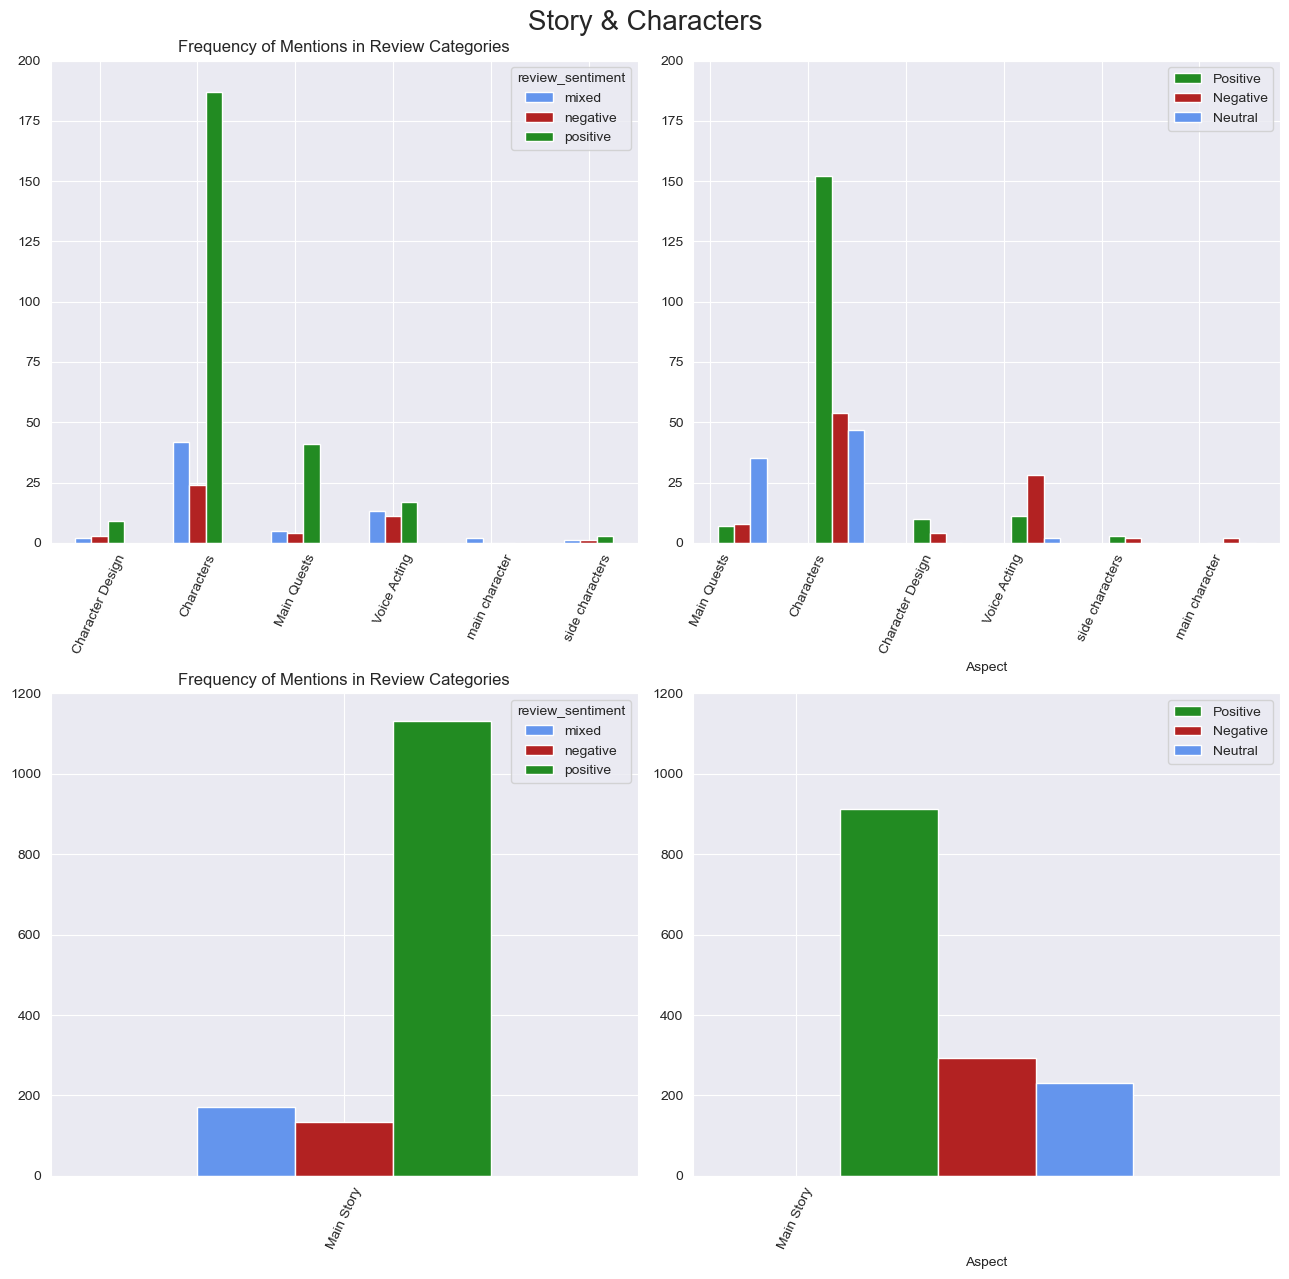

In [71]:
fig, ax = plt.subplots(2,2,figsize=(13,13))
fig.suptitle('Story & Characters', fontsize = 20)
(
storychar_df.explode('Aspects')
                       .query('~Aspects.isin(["Main Story"])')
                       .groupby(['Aspects','review_sentiment'])['review_sentiment']
                       .count()
                       .unstack()
                       .plot.bar(ax=ax[0,0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
)
ax[0,0].set_xlabel('', rotation=0)
#retrieves the y tick values for the plot
yticks_mentions = ax[0,0].get_yticks()

ax[0,0].set_yticks(yticks_mentions)   
(
storychar_sentiments.query('Aspect != "Main Story"')
    .set_index('Aspect')
    .plot.bar(ax=ax[0,1],color=['forestgreen','firebrick','cornflowerblue'],position=-0.15,label='Negative Sentiments', rot=65)
)

ax[0,1].legend(loc='best')
ax[0,1].set_yticks(yticks_mentions)
ax[0,0].set_ylabel('', rotation=0)
###################################################################################################################################################
(
storychar_df.explode('Aspects')
                       .query('Aspects.isin(["Main Story"])')
                       .groupby(['Aspects','review_sentiment'])['review_sentiment']
                       .count()
                       .unstack()
                       .plot.bar(ax=ax[1,0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
)
ax[1,0].set_xlabel('', rotation=0)
#retrieves the y tick values for the plot
yticks_mentions = ax[1,0].get_yticks()
ax[1,0].set_yticks(yticks_mentions)
(
storychar_sentiments.query('Aspect == "Main Story"')
    .set_index('Aspect')
    .plot.bar(ax=ax[1,1],color=['forestgreen','firebrick','cornflowerblue'],position=-0.15,label='Negative Sentiments', rot=65)
)

ax[1,1].legend(loc='best')
ax[1,1].set_yticks(yticks_mentions)
ax[1,0].set_ylabel('', rotation=0)
plt.tight_layout()

## Key Observations
- Main Story: As before the plot and story was clearly a plus point.

#### Niche
- Characters: Majority positive response.
- Main Quests: Primarily neutral response.
- Character Design: While niche there is a lot of praise for the character design.
- Voice Acting: Majority consensus is negative.
- 'main character' was supposed to be combined with "characters" but its only mentioed twice.
- Side Characters: Positive sentiments

With the niche aspects here only "Characters", "Main Quests", and "Voice Acting" show signs of a clear group opinon. With the others I don't think there is enough data to come to a conclusion. Just as before I think these are aspects that players dont think to mention unless they are prompted.

## Presentation

In [62]:
presentation_aspects_df = pd.read_csv('totk_presentation_aspects.csv',index_col=0)
presentation_aspects_df['aspects_within'] = presentation_aspects_df.aspects_within.apply(lambda x: literal_eval(x))

presentation_agg_terms = [('Graphics',['graphics','graphic','graphic fidelity', 'graphical fidelity']),
                          ('Framerate',['framerate', 'fps', 'performance', 'frame rate',  'frame drops',
                                       'performance']),
                          ('Art Direction',['art style', 'art style', 'art-style', 'art direction','artistic direction', 'artistic style']),
                          ('Textures',['texture', 'textures']),
                          ('Cut-Scenes',['cut scenes', 'cutscenes','cut-scenes','cinematics']),
                          ('Animation',['animation','animations']),
                          ('Visuals',['visuals','visual']),
                          ('Resolution',['resolution','picture quality'])]
presentation_aspects_df['Aspects'] = presentation_aspects_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(presentation_agg_terms)))
presentation_aspects_df = pd.concat([totk_reviews['review_sentiment'].iloc[presentation_aspects_df.index.tolist()], presentation_aspects_df], axis=1)
presentation_sentiments_df = pd.read_csv('presentation_sentiments.csv',index_col=0)

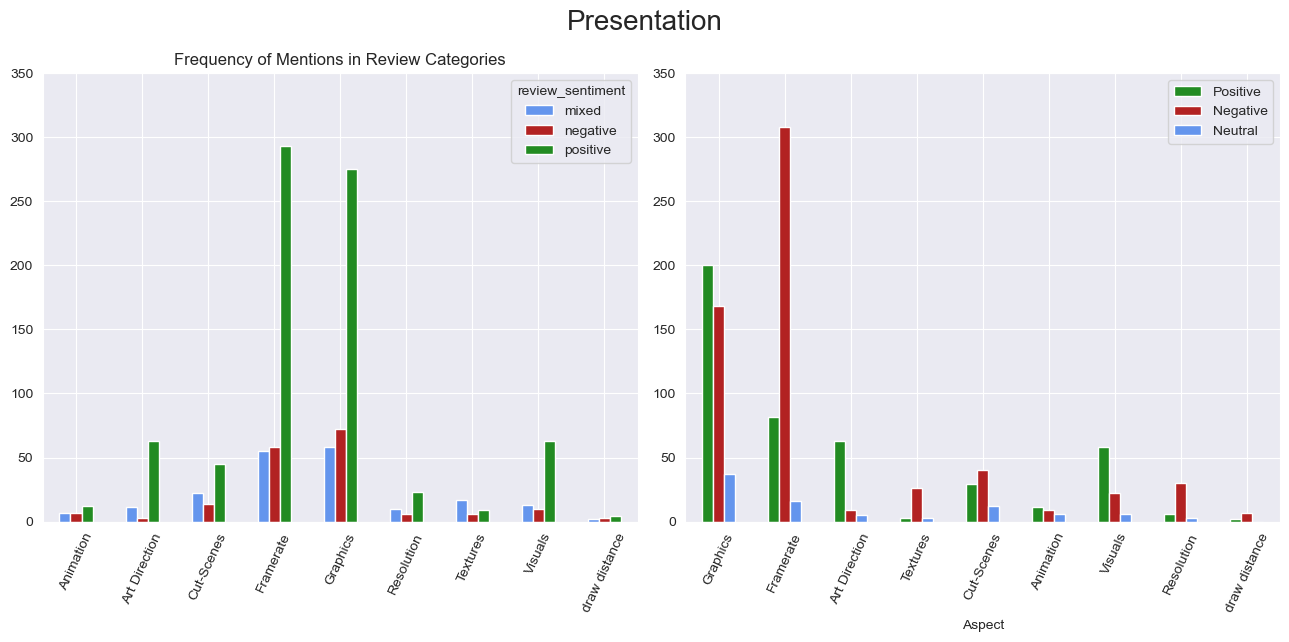

In [69]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Presentation', fontsize = 20)
plots(presentation_aspects_df,presentation_sentiments_df)

plt.tight_layout()

## Key Observations
- Framerate: As expected this aspect was mentioned a greater amount of times and this shows the even greater difference between positive and negative responses.
- Graphics: Similar ratio as the original models output with greater count of mentions. 

For both framerate and graphics we can more easily tell that these aspects were discussed negatively even in negative reviews. 

#### Niche
The other aspects are more niche mentoned in less than 100 views each and in most cases less than 50.

- Art Direction: While niche the majority consensus is positive. Nintendo have a track record for well-recieved aesthetics in this series.
- Visuals: This is a vague aspect and one that I am _assuming_ has more to do with aesthetics. Once again like before a positive response.
- Cut-Scenes: More of a mixed response, more negative than positive response, despite more mentioned in positive reviews.
- Textures: Majority negative response
- Resolution: Majority negative response
- Animation: Mixed Response
- draw distance: Practically not enough data and an extremely niche aspect of a games visuals and graphics.

## Audio

In [22]:
audio_aggterms = [('Sound Design', ['audio design','sound design','audio','sound effects'] ),
                   ('Soundtrack',['soundtrack','sound effects', 'music score','musical score', 'ost','original soundtrack',
                                  'ambient music', 'ambient soundtrack','music'])]

audio_asp_df =  pd.read_csv('totk_audio_aspects.csv',index_col=0)
audio_asp_df['aspects_within'] = audio_asp_df.aspects_within.apply(lambda x: literal_eval(x))

audio_asp_df['Aspects'] = audio_asp_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(audio_aggterms)))

audio_asp_df = pd.concat([totk_reviews['review_sentiment'].iloc[audio_asp_df.index.tolist()], audio_asp_df], axis=1)
audio_sentiments = pd.read_csv('audio_sentiments.csv',index_col=0)


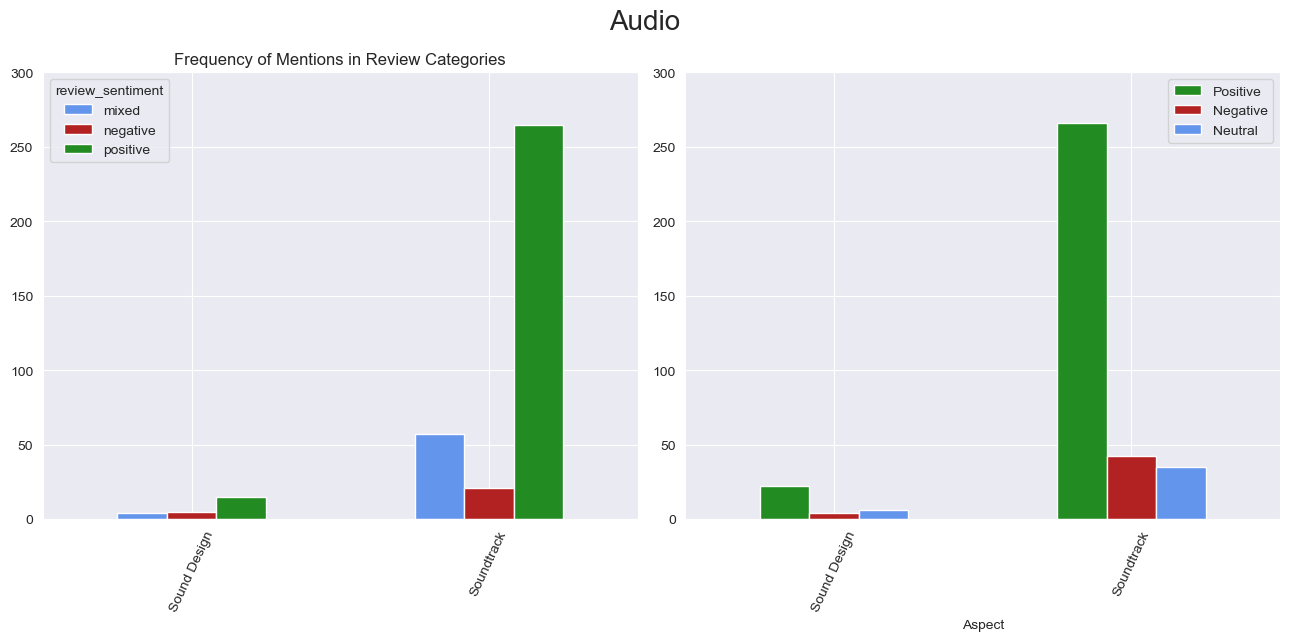

In [70]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Audio', fontsize = 20)
plots(audio_asp_df,audio_sentiments)
plt.tight_layout()

## Key Observations:
Positivity all around for aspects of the audio. Very few users comment on details like sound effects and technical implementation of sound in the game.

## Combat

In [39]:
combat_aggterms = [('Combat',['combat system', 'combat','battle system']),
                   ('Weapon Durability',['weapon durability', 'weapon breaking' ,'weapon break' ,'weapon breaks',
                                         'weapon breakage', 'weapons that break', 'breakable weapons', 'weapons still break',
                                         'weapon degradation', 'weapon system']),
                   ('Weapon Fusion',['weapon fusion','weapon fusing','weapon crafting','weapon combinations','combine weapons',
                                     'combine weapon']),
                   ('Health & Healing',['healing','heal','health']),
                   ('Armour and Clothing',['armour','clothing','clothes','outfit','oufits']),
                   ('Dodging and Flurry Rush',['flurry rush', 'dodge', 'dodging']),
                   ('Weapon Variety',['new weapons','new weapon','weapon variety','weapons variety'])]


combat_df =  pd.read_csv('totk_combat_aspects.csv',index_col=0)
combat_df['aspects_within'] = combat_df.aspects_within.apply(lambda x: literal_eval(x))

combat_df['Aspects'] = combat_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(combat_aggterms)))

combat_df = pd.concat([totk_reviews['review_sentiment'].iloc[combat_df.index.tolist()], combat_df], axis=1)
combat_sentiments = pd.read_csv('combat_sentiments.csv',index_col=0)

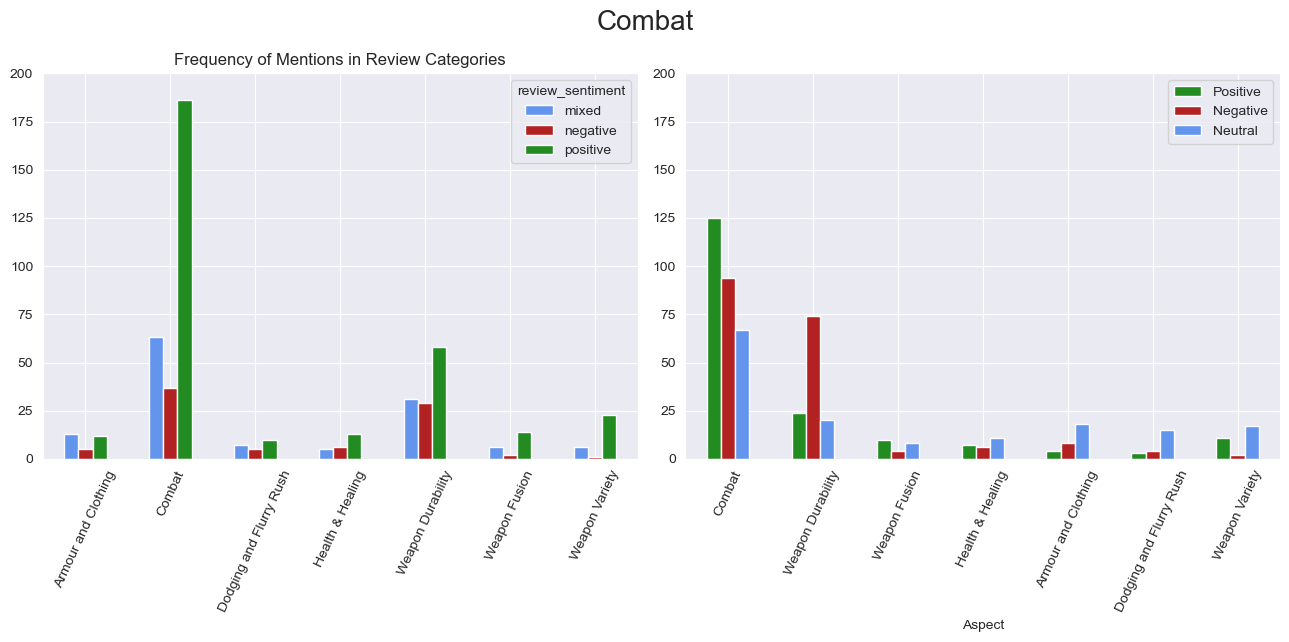

In [72]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Combat', fontsize = 20)
plots(combat_df,combat_sentiments)
plt.tight_layout()

## Key Observations
For this run of the model I opted out of using "weapons" as a category as it is vague and there are many terms and phrases such as "weapon durability", "weapon varitey" etc that clearly discuss a particular aspect that the model would consider talking about "weapons".

- Combat: Vague once more but with a mixed/positive opinion. Once again this will have crossover with weapon durability, enemy variety, controls etc. overall there is a stronger skew toward positivity but the ratio of negative:positive sentiments is an indication that there is in room for improvement in the combat system
- Weapon Durability: Very obvious negative response

#### Niche

- Weapon Variety: Neutral and positive response
- Flurry Rush and Dodiging: Mainly Neutral
- Health and Healing: Mixed response
- Weapon Fusion: Positive and Neutral response

These nicher aspects are mentioned very few times and more data would be required to get a better assessment of player opinions.

## Bosses and Enemies

In [44]:
bossenemy_aggterms = [('Main Bosses',['bosses','dungeon bosses','boss fights','boss battles',
                                        'temple boss', 'temple bosses', 'boss battle',
                                       'boss encounter', 'colgera','gohma', 'seized construct','queen gibdo']),
                       ('Mini-Bosses',['phantom ganon','gloom hands', 'lynel','hinox','frox','gleeok', 'mini boss','mini bosses','mini-boss']),
                       ('Enemy Variety',['enemy variety', 'monster variety','monster types','enemy types', 'variety of enemies',
                      'new enemies', 'enemy diversity']),
                       ('Final Boss',['final boss', 'final battle','last boss']),
                       ('Enemies',['bokoblins','moblins','lizalfos','enemies'])]


bossenemy_df =  pd.read_csv('totk_bossenemy_aspects.csv',index_col=0)
bossenemy_df['aspects_within'] = bossenemy_df.aspects_within.apply(lambda x: literal_eval(x))

bossenemy_df['Aspects'] = bossenemy_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(bossenemy_aggterms)))

bossenemy_df = pd.concat([totk_reviews['review_sentiment'].iloc[bossenemy_df.index.tolist()], bossenemy_df], axis=1)
bossenemy_sentiments = pd.read_csv('bossenemy_sentiments.csv',index_col=0)

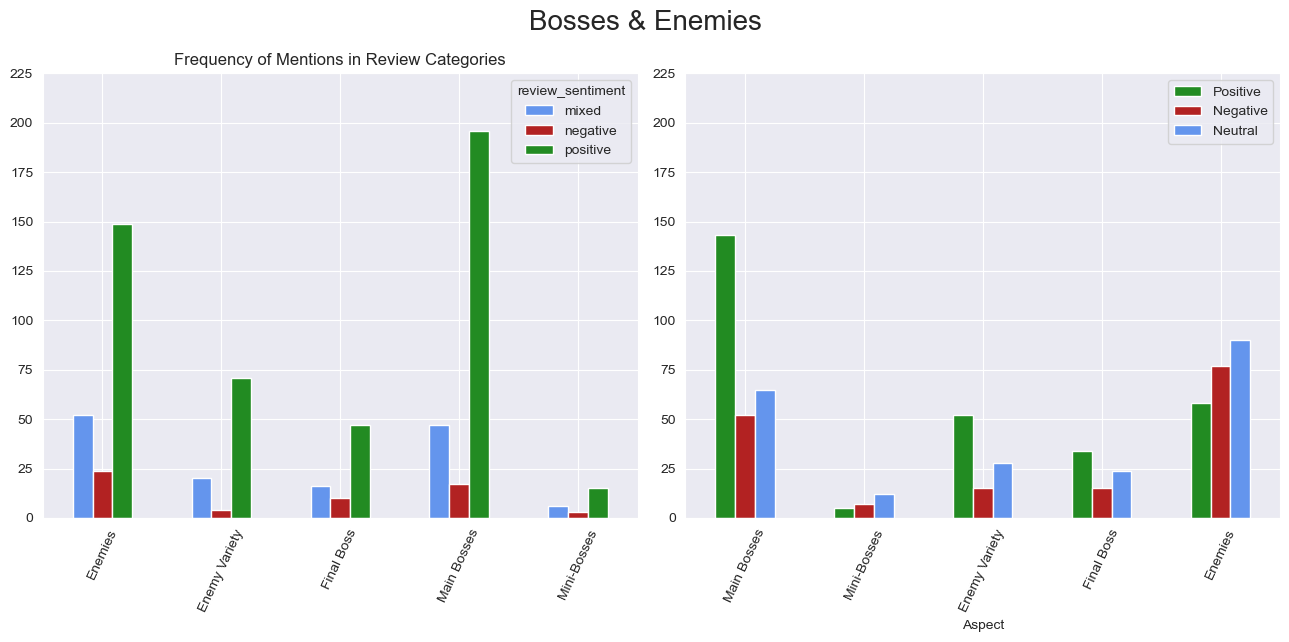

In [73]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Bosses & Enemies', fontsize = 20)
plots(bossenemy_df,bossenemy_sentiments)
plt.tight_layout()

## Key Observations
- Main Bosses: The gap between mentions in positive reviews against actual positive sentiments, is noticeable. Overall positive reception toward the main bosses found in the game.

"Enemies" and "Enemy Variety" sub-aspects/synonymous terms/phrases were originally joined here they are are separated. 
- Enemies: Compared to last time, with the redefied aspects and synonymous terms "Enemies" recieves a more  mixed response.
- Enemy Variety: Majority positive response

#### Niche

- Final Boss: More positive and neutral.
- Mini-Bosses: Not enough data to really assess the opinion here. The aspects included the names of every mini-boss in the game.

## Abilities

In [42]:
abilities_aggterms = [('Abilities',['abilities','powers']),
                      ('Fuse',['fuse', 'fuse ability', 'fuse mechanic', 'fusion','fusion ability','fusing ability', 'fusing']),
                      ('Ascend',['ascend' ,'ascend ability', 'ascension']),
                      ('Recall',['recall','recall ability','rewind','reverse mechanic', 'time reverse', 'time reversal', 'reversal mechanic'])]


abilities_df =  pd.read_csv('totk_abilities_aspects.csv',index_col=0)
abilities_df['aspects_within'] = abilities_df.aspects_within.apply(lambda x: literal_eval(x))

abilities_df['Aspects'] = abilities_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(abilities_aggterms)))

abilities_df = pd.concat([totk_reviews['review_sentiment'].iloc[abilities_df.index.tolist()], abilities_df], axis=1)
abilities_sentiments = pd.read_csv('abilities_sentiments.csv',index_col=0)

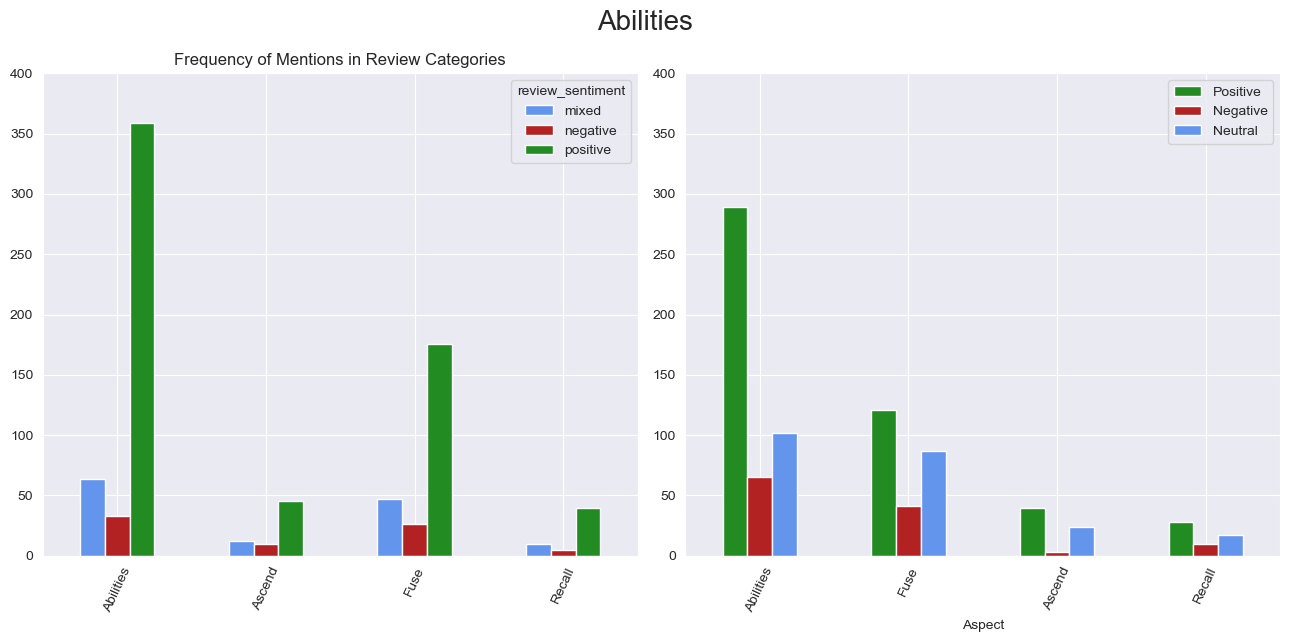

In [74]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Abilities', fontsize = 20)
plots(abilities_df,abilities_sentiments)
plt.tight_layout()

## Key Observations
- Abilities: Overall the response toward abilities is overwhelmingly positive.
- Fuse: Overall Positive and Neutral
- Ascend and Recall: Not mentioned frequently but a greater ratio of positivity and negativity compared to Fuse.

## Ultrahand 

In [48]:
ultrahand_aggterms = [('Ultrahand',['ultra hand','ultrahand','ultrahand ability', 'ultra-hand']),
                      ('AutoBuild',['autobuild', 'auto build', 'auto building']),
                      ('Building/Construction',['build','construction', 'building system','building mechanic',
                                                'building', 'vehicle building','building vehicles']),
                      ('Zonai Devices',['zonai devices','zonau devices','zonau device', 'zonai gadget','zonnan gadgets'])]



ultrahand_df =  pd.read_csv('totk_ultrahand_aspects.csv',index_col=0)
ultrahand_df['aspects_within'] = ultrahand_df.aspects_within.apply(lambda x: literal_eval(x))

ultrahand_df['Aspects'] = ultrahand_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(ultrahand_aggterms)))

ultrahand_df = pd.concat([totk_reviews['review_sentiment'].iloc[ultrahand_df.index.tolist()], ultrahand_df], axis=1)
ultrahand_sentiments = pd.read_csv('ultrahand_sentiments.csv',index_col=0)

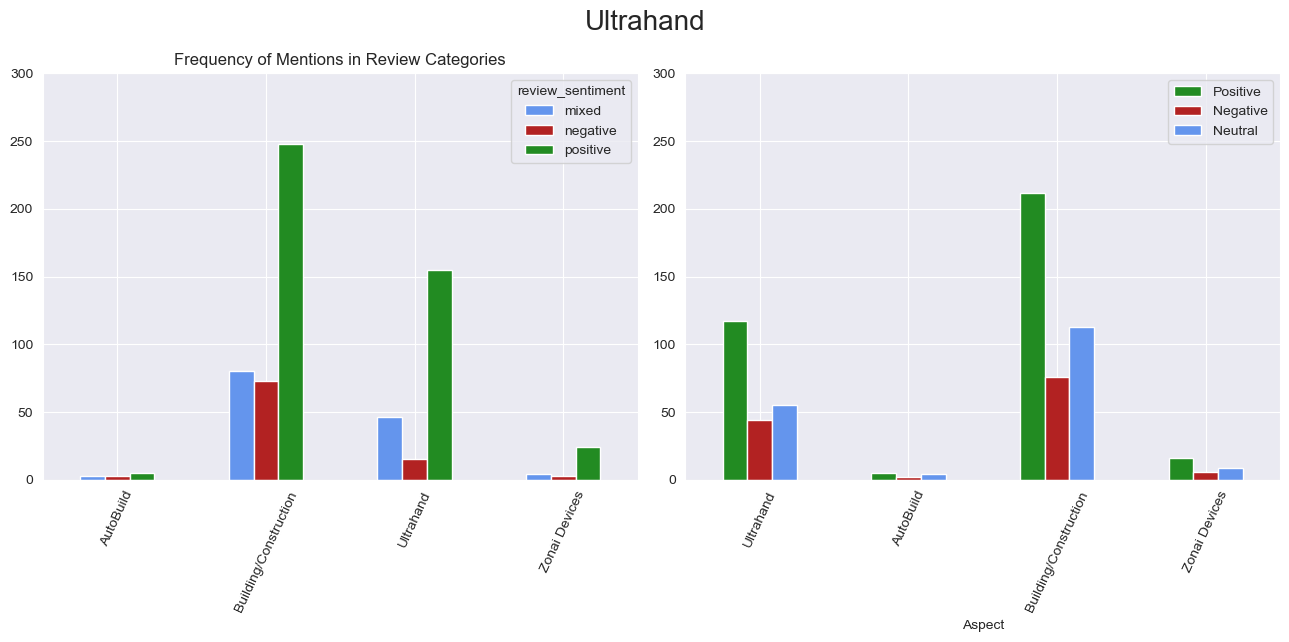

In [75]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Ultrahand', fontsize = 20)
plots(ultrahand_df,ultrahand_sentiments)
plt.tight_layout()

## Key Observations
- Ultrahand: Positive Reception with a near equela level of a mix of negative + neutral responses.
- Building and Construction: The central gimmick of Tears of the Kingdom was the ability to build different objects along with a robust and engagin physics system. Overall The reponse is mainly positive.

- Zonai Devices: Objects in the game that can be used idndividually with the fuse or ultrahand mechanic to facilitate more complex buildable objects like catapults, vehicles and cannons. It's a large concept however is mentioned very few times. When mentioned however the response is mainly neutral and positive.
- AutoBuild: Ability that let;s you rebuild objects you've already made instantly, hardly mentioned and more data would be needed to gain a more accurate representation of player opinion.



## Puzzles, Shrines and Dungeons

In [50]:
puzzles_aggterms = [('Dungeons', ['dungeons', 'dungeon','temple','temples']),
                    ('Shrines',['shrines','shrine','shrine quests','shrine quest']),
                    ('Puzzles',['puzzle','puzzles','solving puzzles','problem solving'])]




puzzles_df =  pd.read_csv('totk_puzzles_aspects.csv',index_col=0)
puzzles_df['aspects_within'] = puzzles_df.aspects_within.apply(lambda x: literal_eval(x))

puzzles_df['Aspects'] = puzzles_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(puzzles_aggterms)))

puzzles_df = pd.concat([totk_reviews['review_sentiment'].iloc[puzzles_df.index.tolist()], puzzles_df], axis=1)
puzzles_sentiments = pd.read_csv('puzzles_sentiments.csv',index_col=0)

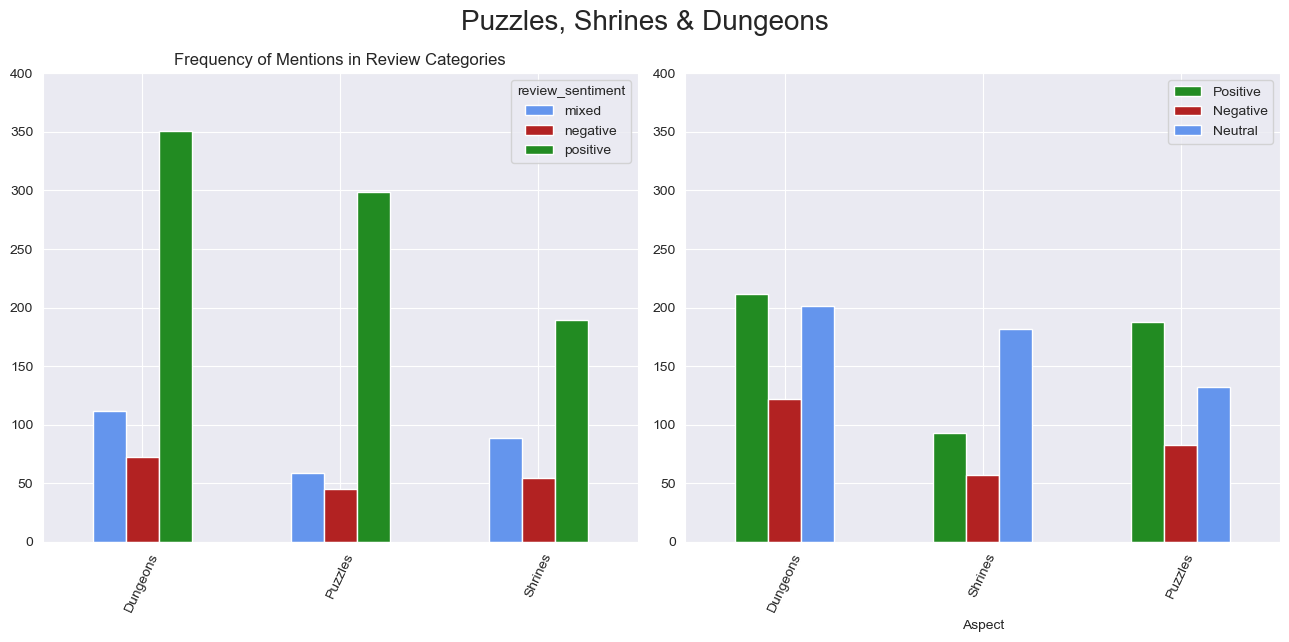

In [77]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Puzzles, Shrines & Dungeons', fontsize = 20)
plots(puzzles_df,puzzles_sentiments)
plt.tight_layout()

## Key Observations
#### Comparison to previous model:
- Shrines have a greater proportion of neutral responses
- Dungeons and Puzzles have fewer neutral responses in comparison

#### MAIN ANALYSIS
- Dungeons: Near equal level of positive and neutral sentiments. However roughly 2:1 ration of positive to negative. While positivity is a clearly in the majority having ~1/5th of players express a negative sentiment is an indication to improve in that area.
- Shrines, predominantly neutral sentiments. (Possibility is that sentiments were expressed over multiple sentences not just one as this version of the analysis presumed)
- Puzzles: Majority positive response. ~100 more positive sentiments than negative ones.

## Side Content

In [78]:
sidecontent_aggterms = [('Side Quests',['side quests', 'side quest','sidequest','side-quest']),
                        ('Side Adventures',['side adventures', 'side adventure','adventures side', 'side stories']),
                        ('Misc Terms',[ 'side content', 'side missions', 'find treasure','mini-games','minigames','mini games'])]


sidecontent_df =  pd.read_csv('totk_sidecontent_aspects.csv',index_col=0)
sidecontent_df['aspects_within'] = sidecontent_df.aspects_within.apply(lambda x: literal_eval(x))

sidecontent_df['Aspects'] = sidecontent_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(sidecontent_aggterms)))

sidecontent_df = pd.concat([totk_reviews['review_sentiment'].iloc[sidecontent_df.index.tolist()], sidecontent_df], axis=1)
sidecontent_sentiments = pd.read_csv('sidecontent_sentiments.csv',index_col=0)

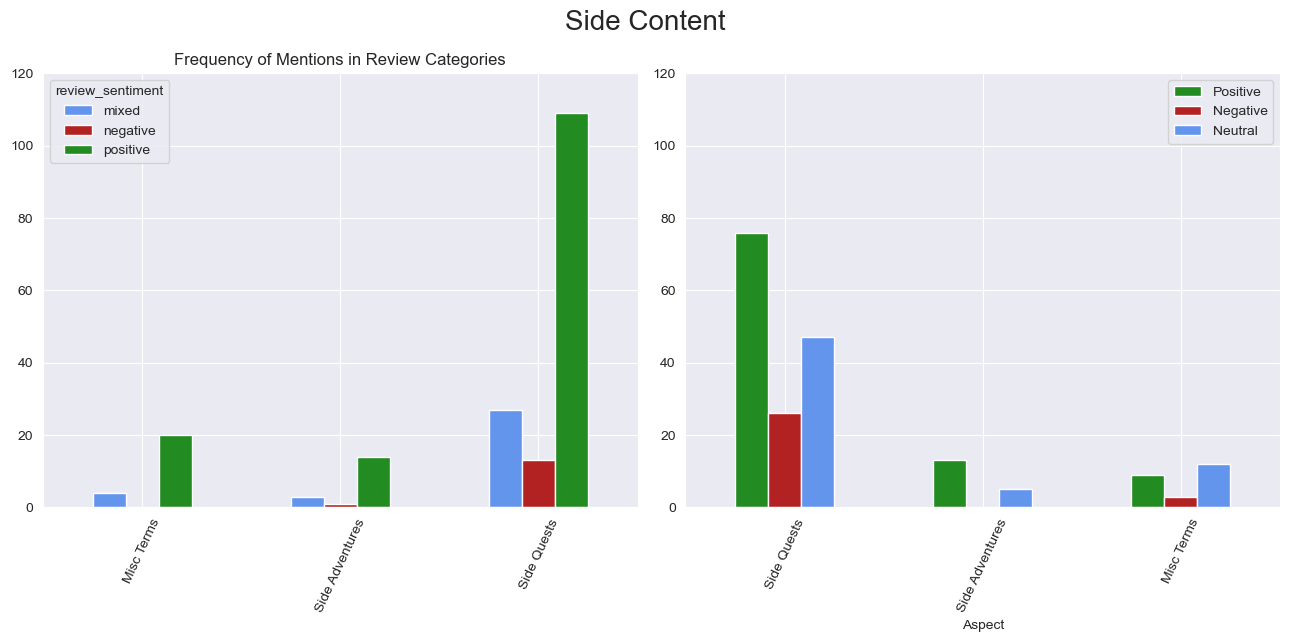

In [79]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('Side Content', fontsize = 20)
plots(sidecontent_df,sidecontent_sentiments)
plt.tight_layout()

## Key Observations
In this scenario, mic terms inlcuded references to mini-games, finding treaure, the term "side missions" which could be synonymous for adventures or quests. Also "side content", which is a more broad term.

- Side Quests: Mentioned just under 150 times it's surprising that players do not reference a large portion of the games content. However overall there is a positive sentiment toward these.
- Side Adventures: These are quests that often involve main characters and involve more in depth tasks for the player alongside more meaningful rewards. The number of times it is referenced is very small (under 20!) However it's mainly in a positive if not neutral context. Which is unsurprising as in summary these are side quests "but better".
- Misc Terms: A vague soup of terms that hoped to summarise the sentiments toward remaining side content. Unsurprsingly if "side quests" are so frequently mentioned in reviews that mini-games and references to treasures found throughout the map would be smaller.

More opinion data is required on side adventures and other side content found in the game to form a more accurate picture of overall user sentiment.

## World Map

In [80]:
world_aggterms = [('World',['open world','world building','the map','world map','new areas']),
                  ('Depths',['the depths', 'underground areas','underground area','under ground','the undergound','underground','underworld','under world']),
                  ('Sky',['sky','sky island','sky islands','sky areas','sky archipelago','the skies']),
                  ('Caves',['caves','cave']),
                  ('Wells',['wells']),
                  ('Hyrule',['hyrule','world of hyrule','hyrule map'])]


world_df =  pd.read_csv('totk_world_aspects.csv',index_col=0)
world_df['aspects_within'] = world_df.aspects_within.apply(lambda x: literal_eval(x))

world_df['Aspects'] = world_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(world_aggterms)))

world_df = pd.concat([totk_reviews['review_sentiment'].iloc[world_df.index.tolist()], world_df], axis=1)
world_sentiments = pd.read_csv('world_sentiments.csv',index_col=0)

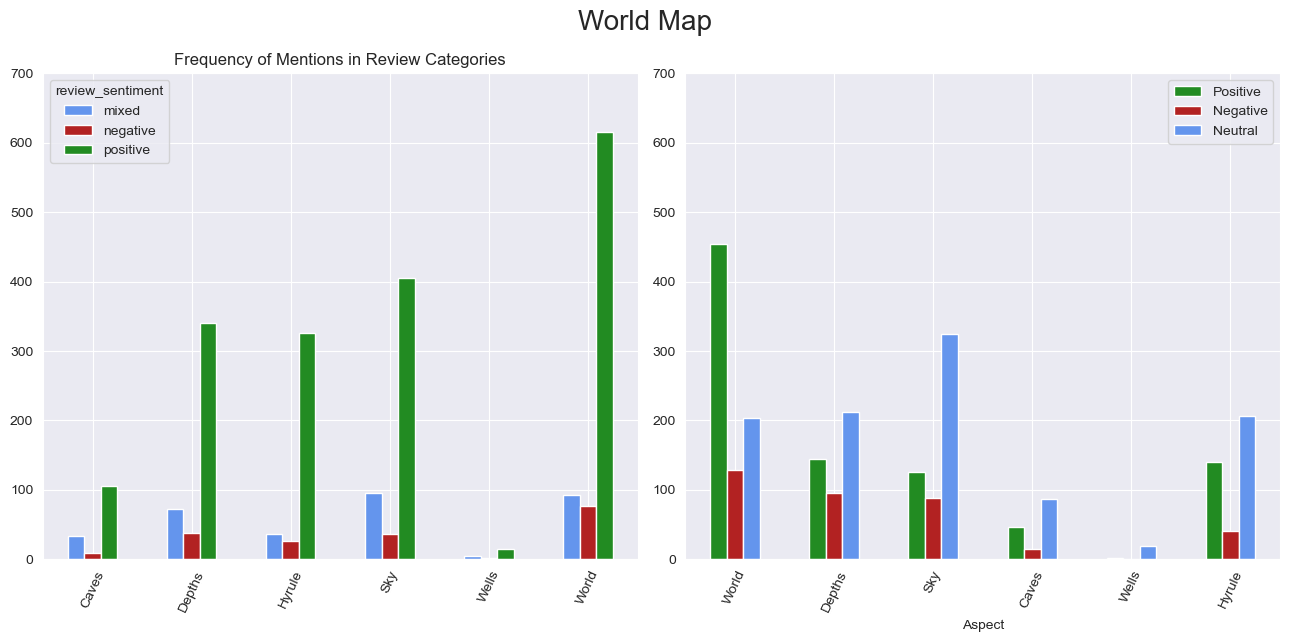

In [81]:
fig, ax = plt.subplots(1,2,figsize=(13,6.5))
fig.suptitle('World Map', fontsize = 20)
plots(world_df,world_sentiments)
plt.tight_layout()

## World Map
When discussing world the discrepancies in the models results being to show in a more obvious way. Originally many saspects here were referenced positively however this time many have overall neutral sentiments toward them. 

- World: Overall Positive response. However due to using more specific terms to reference "world" has fewer mentions here.
- Sky: Significant Neutral response. Positive sentiments only leading negative ones by a small margin. 
- Depths: Larger neutral response however there is more positivty than negativity here.
- Caves: Mainly neutral and positive
- Wells: Neutral
- Hyrule: Mainly neutral and positive, far fewer negative sentiments (less than 50 compared to over 100 positive).

## Exploration & Traversal

In [82]:
exploration_aggterms = [('Exploration',['world exploration', 'exploration','exploring','explore','exploring areas','explore areas']),
                        ('Climbing',['climbing','climb']),
                        ('Horses',['horse','horses', 'horse riding','horseback riding']),
                        ('Vehicles',['vehicles','vehicle','flying machine','bike','air bike','hover bike','hoverbike','car']),
                        ('Gliding',['glide','gliding','paraglider','paragliding']),
                        ('Skydiving',['diving','sky dive','sky diving','skydive','skydiving']),
                        ('Battery',['battery', 'batteries','zonai charges', 'zonai charge'])]


exploration_df =  pd.read_csv('totk_exploration_aspects.csv',index_col=0)
exploration_df['aspects_within'] = exploration_df.aspects_within.apply(lambda x: literal_eval(x))

exploration_df['Aspects'] = exploration_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(exploration_aggterms)))

exploration_df = pd.concat([totk_reviews['review_sentiment'].iloc[exploration_df.index.tolist()], exploration_df], axis=1)
exploration_sentiments = pd.read_csv('exploration_sentiments.csv',index_col=0)

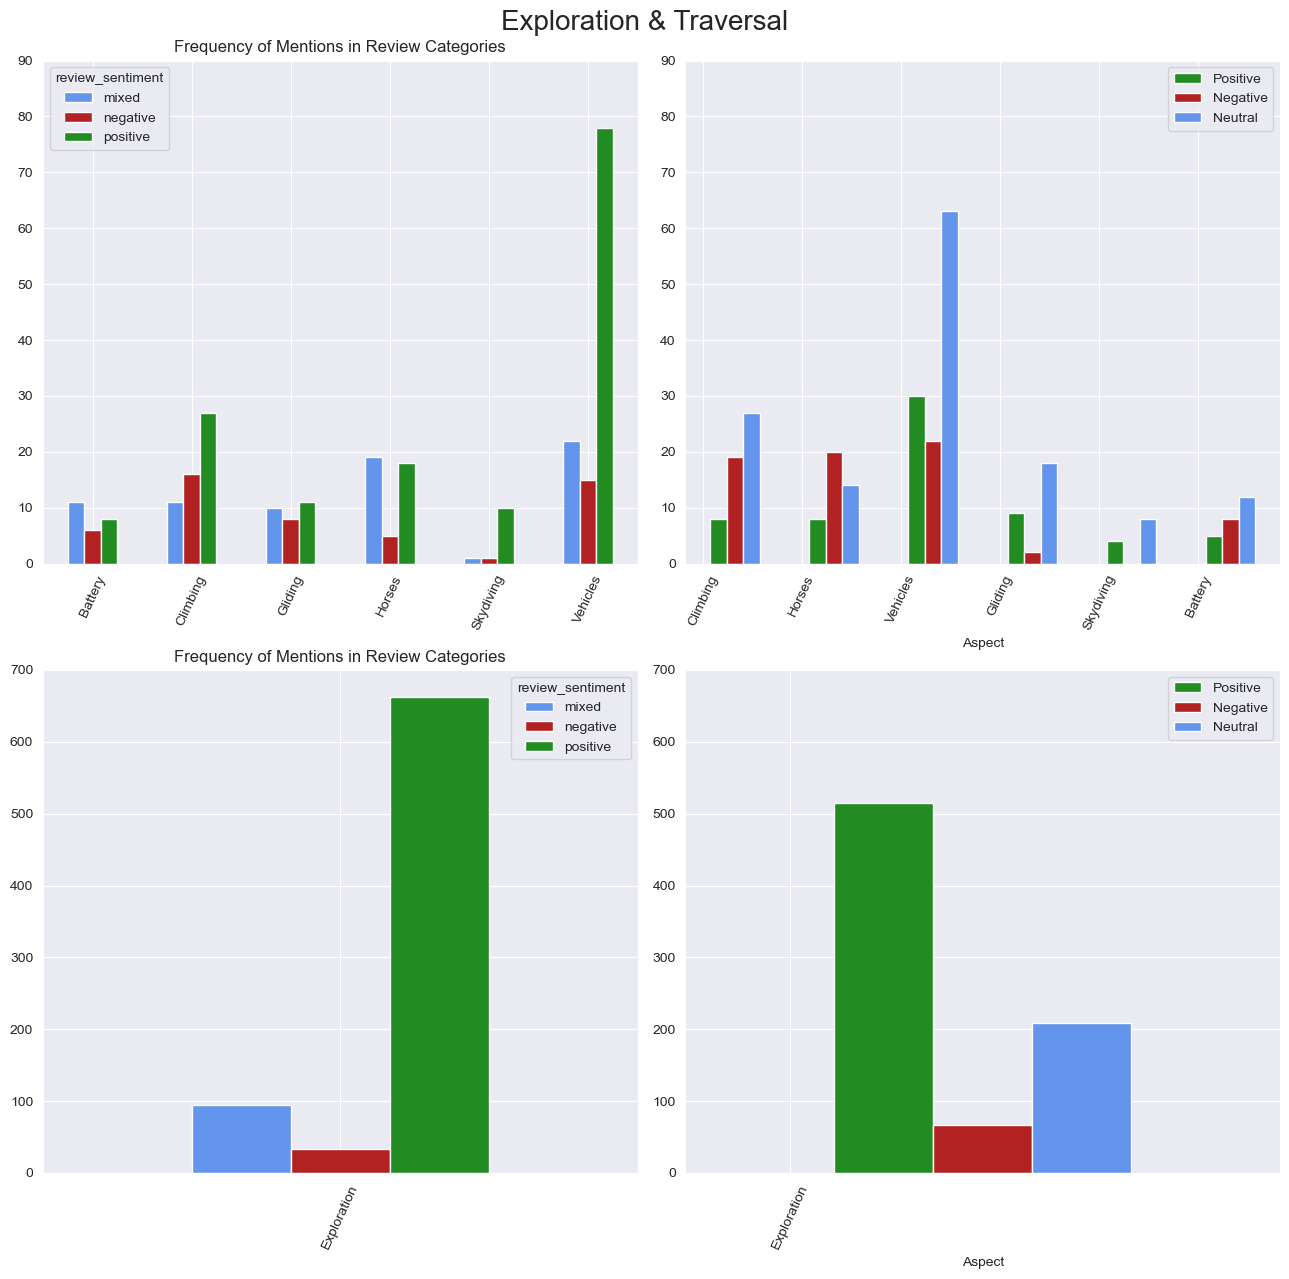

In [87]:
fig, ax = plt.subplots(2,2,figsize=(13,13))
fig.suptitle('Exploration & Traversal', fontsize = 20)

(
exploration_df.explode('Aspects')
                       .query('~Aspects.isin(["Exploration"])')
                       .groupby(['Aspects','review_sentiment'])['review_sentiment']
                       .count()
                       .unstack()
                       .plot.bar(ax=ax[0,0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
)
ax[0,0].set_xlabel('', rotation=0)
#retrieves the y tick values for the plot
yticks_mentions = ax[0,0].get_yticks()

ax[0,0].set_yticks(yticks_mentions)   
(
exploration_sentiments.query('Aspect != "Exploration"')
    .set_index('Aspect')
    .plot.bar(ax=ax[0,1],color=['forestgreen','firebrick','cornflowerblue'],position=-0.15,label='Negative Sentiments', rot=65)
)

ax[0,1].legend(loc='best')
ax[0,1].set_yticks(yticks_mentions)
ax[0,0].set_ylabel('', rotation=0)
###################################################################################################################################################
(
exploration_df.explode('Aspects')
                       .query('Aspects.isin(["Exploration"])')
                       .groupby(['Aspects','review_sentiment'])['review_sentiment']
                       .count()
                       .unstack()
                       .plot.bar(ax=ax[1,0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
)
ax[1,0].set_xlabel('', rotation=0)
#retrieves the y tick values for the plot
yticks_mentions = ax[1,0].get_yticks()
ax[1,0].set_yticks(yticks_mentions)
(
exploration_sentiments.query('Aspect == "Exploration"')
    .set_index('Aspect')
    .plot.bar(ax=ax[1,1],color=['forestgreen','firebrick','cornflowerblue'],position=-0.15, rot=65)
)

ax[1,1].legend(loc='best')
ax[1,1].set_yticks(yticks_mentions)
ax[1,0].set_ylabel('', rotation=0)

plt.tight_layout()

## Exploration and Traversal
- Exploration: Overall positive response. While there are fewer positive responses compared to mentions in positive reviews the marginal increase for mixed reviews to neutral responses is larger than the proportion of negative responses and negative reviews.

#### Niche
- Vehicles: Despite being a large part of marketing materials and a near essential component of the gameplay there were not many references to vehicles in the game. This aspect covered terms like "flying machines" to "cars". There is a much larger neutral response than positive or negative with the negative and positive sentiment counts being very similar.
- Horses: Negative responses toward horses
- Climbing: Mostly neutral and negative
- Gliding: Neutral and positive
- Skydiving: Only Neutral and positive
- Battery: Batteries were the way of powering the vehicles in the game. The sentiments are neutral and negative mainly.

Overall I think more data is required for most of these aspects to create a more accurate representation of these aspects.

## Other

In [88]:
other_aggterms = [('UI',['user interface','ui','menu','menus','menu interface','interface','ability wheel']),
                  ('Gameplay',['gameplay', 'game play']),
                  ('Physics',['physics','physics engine','physic']),
                  ('Mechanics',['mechanics']),
                  ('Price',['price','cost']),
                  ('Collectibles',['collectibles','collectible','koroks','korok seeds']),
                  ('Inventory',['inventory'])]



other_df =  pd.read_csv('totk_other_aspects.csv',index_col=0)
other_df['aspects_within'] = other_df.aspects_within.apply(lambda x: literal_eval(x))

other_df['Aspects'] = other_df.aspects_within.apply(lambda x: aspect_name_replacement(x,make_dict(other_aggterms)))

other_df = pd.concat([totk_reviews['review_sentiment'].iloc[other_df.index.tolist()], other_df], axis=1)
other_sentiments = pd.read_csv('other_sentiments.csv',index_col=0)

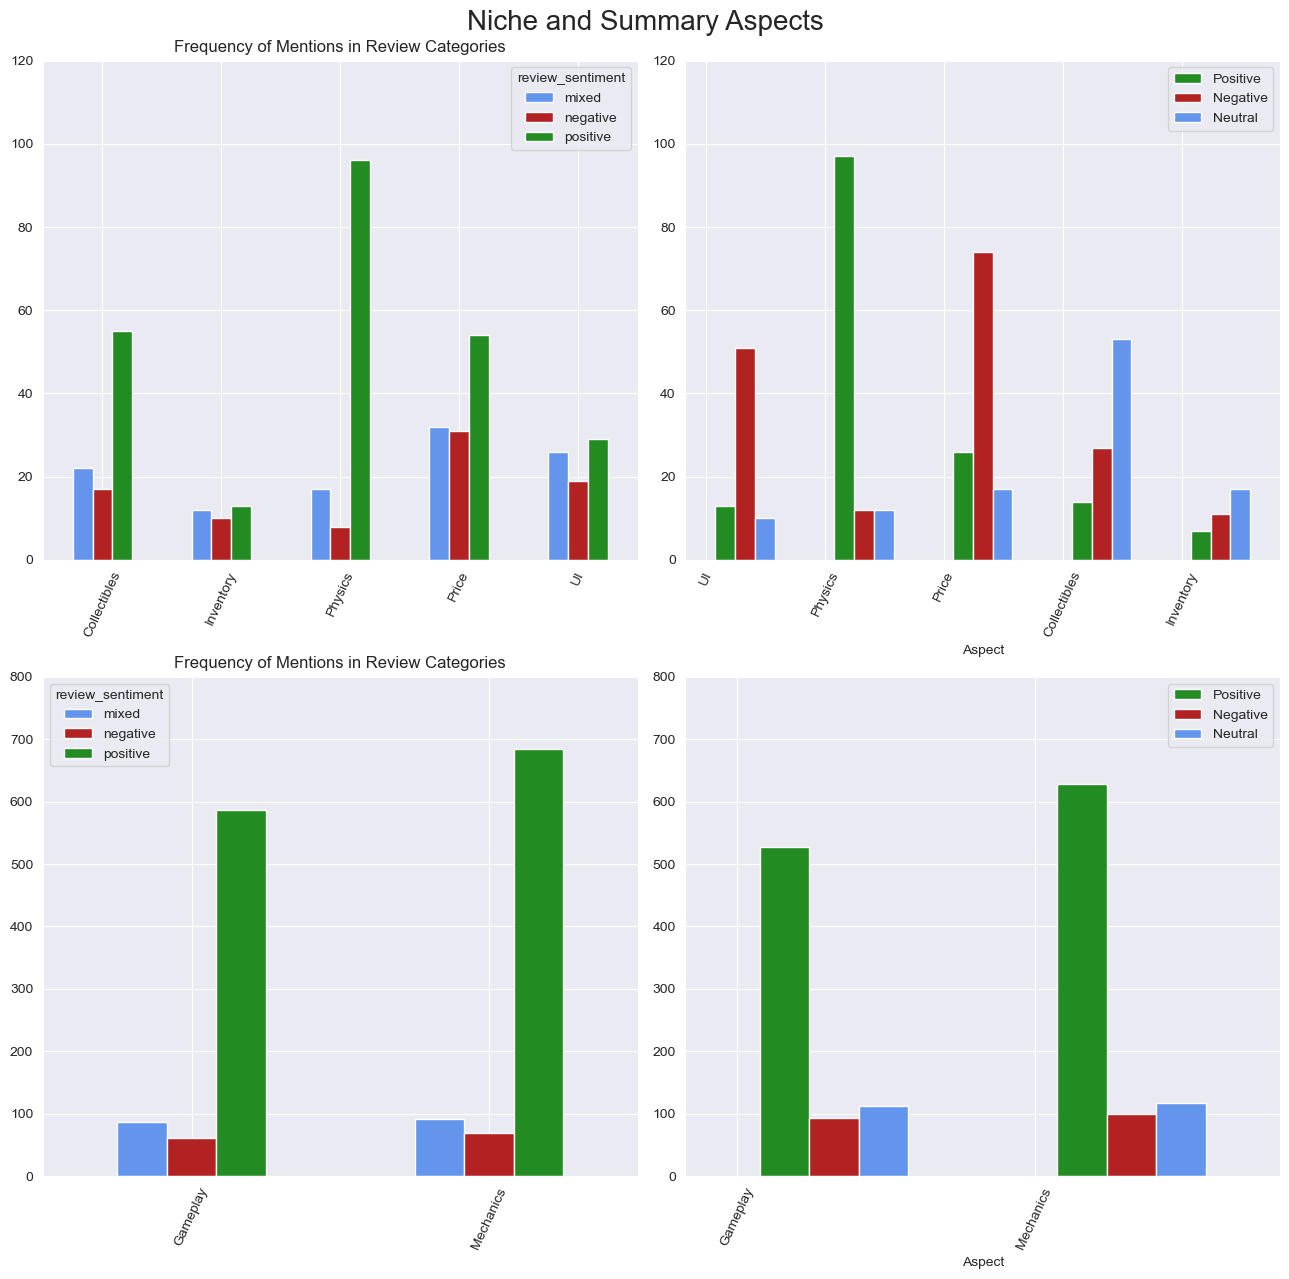

In [92]:
fig, ax = plt.subplots(2,2,figsize=(13,13))
fig.suptitle('Niche and Summary Aspects', fontsize = 20)

(
other_df.explode('Aspects')
                       .query('~Aspects.isin(["Gameplay","Mechanics"])')
                       .groupby(['Aspects','review_sentiment'])['review_sentiment']
                       .count()
                       .unstack()
                       .plot.bar(ax=ax[0,0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
)
ax[0,0].set_xlabel('', rotation=0)
#retrieves the y tick values for the plot
yticks_mentions = ax[0,0].get_yticks()

ax[0,0].set_yticks(yticks_mentions)   
(
other_sentiments.query('~Aspect.isin(["Gameplay","Mechanics"])')
    .set_index('Aspect')
    .plot.bar(ax=ax[0,1],color=['forestgreen','firebrick','cornflowerblue'],position=-0.15,label='Negative Sentiments', rot=65)
)

ax[0,1].legend(loc='best')
ax[0,1].set_yticks(yticks_mentions)
ax[0,0].set_ylabel('', rotation=0)
###################################################################################################################################################
(
other_df.explode('Aspects')
                       .query('Aspects.isin(["Gameplay","Mechanics"])')
                       .groupby(['Aspects','review_sentiment'])['review_sentiment']
                       .count()
                       .unstack()
                       .plot.bar(ax=ax[1,0],color=['cornflowerblue','firebrick','forestgreen'], title='Frequency of Mentions in Review Categories', rot = 65)
)
ax[1,0].set_xlabel('', rotation=0)
#retrieves the y tick values for the plot
yticks_mentions = ax[1,0].get_yticks()
ax[1,0].set_yticks(yticks_mentions)
(
other_sentiments.query('Aspect.isin(["Gameplay","Mechanics"])')
    .set_index('Aspect')
    .plot.bar(ax=ax[1,1],color=['forestgreen','firebrick','cornflowerblue'],position=-0.15, rot=65)
)

ax[1,1].legend(loc='best')
ax[1,1].set_yticks(yticks_mentions)
ax[1,0].set_ylabel('', rotation=0)

plt.tight_layout()

## Key Observations:
- Gameplay and Mechanics: Extremely vague terms that summarise almost everything interactable in a videogame. As before, these are recieved very positively

- Physics: Overwhelmingly positive response
- UI: Overhwelmingly negative, despite being niche (mentioned only about 70 times)
- Price: Overwhelmingly negative
- Collectibles: Predominantly neutral and then negative response. Collectibles covers terms like "koroks"
- Inventory: Very few mentioned and more opinion data to know the overall player sentiments.